# Lesson 1 Assignment - EnergyLoads
## _Author - Rodolfo Lerma_

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

## First look at the data

### About the data set

This data set is from the [Univeristy of Washigton Library](https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv) (no more information is available).
The variables contained in this data set are:

In [3]:
#Reading the file and ensuring the variables as numeric values.
thermal_eff = pd.read_csv(fileName)
cols = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']

for i in cols:
    thermal_eff[i] = pd.to_numeric(thermal_eff[i])

In [4]:
#Check the Data type for each attribute
thermal_eff.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

The data set contains 10 Variables (attributes) with 768 records each as seen in the shape of table:

In [5]:
#Check the shape of the data array
thermal_eff.shape

(768, 10)

**Summary:**
- The data set contains 768 rows.
- The data set has 10 variables (columns.
- All columns except for 2 are float64. The 2 that are not belong to the int64 data type.
- No missing values exists in the data set.

## Summary Statistics

In [6]:
thermal_eff.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


From the table above it is possible to see that the attributes Heating Load and Cooling Load are pretty close to each other and their distribution is pretty similar.

### Examine the data frame

Looking at the first and last 5 rows, it is possible to see that Orientation and Glazing Area Distribution could be seen as factors.

In [7]:
thermal_eff.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
thermal_eff.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


## First look at the distribution
## Histagram

From the histagrams below it is possible to see the following:
- Not only `Orientation` & `Glazing Area Distribution` are close to a categorical value (factor) but also `Glazing Area`
- `Cooling Load` and `Heating Load` have a pretty similar distribution.

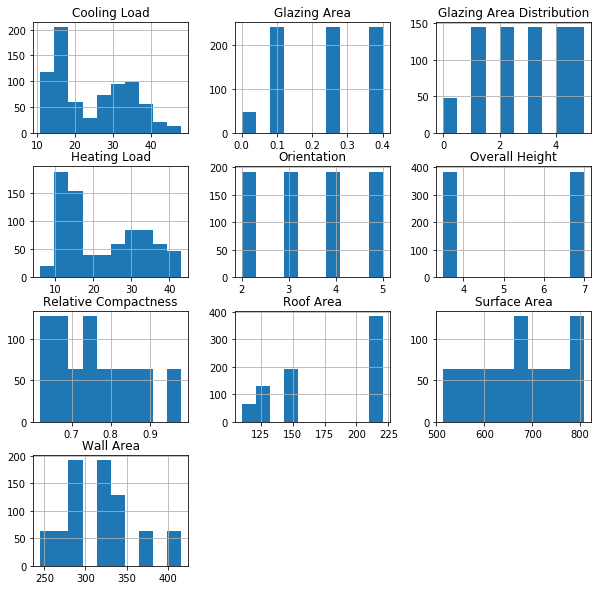

In [9]:
thermal_eff.hist(figsize = (10,10))
plt.show()

## Correlation and Scatter Matrix Plot

Looking at the correlation & scatter matrix plots we can notice some characteristics of the data:
- `Heating & Cooling Load` almost have a 1 to 1 correlation, therefore in this analysis I will be working with only one fo the 2 for simplicity. Any conclusion obtain from one this variable should apply to the other as well.
- We see no correlation between the `Heating (or Cooling) Load` and `Orientation`, `Glazing Area` & `Glazing Area Distribution` (at least not at this level).
- Some strong correlations & swappings are seeing with `Heating Load` and `Surface Area`,`Roof Area`, `Relative Compactness` & `Overall Hight`.
- A not so strong correlation is seeing for `Wall Area`.

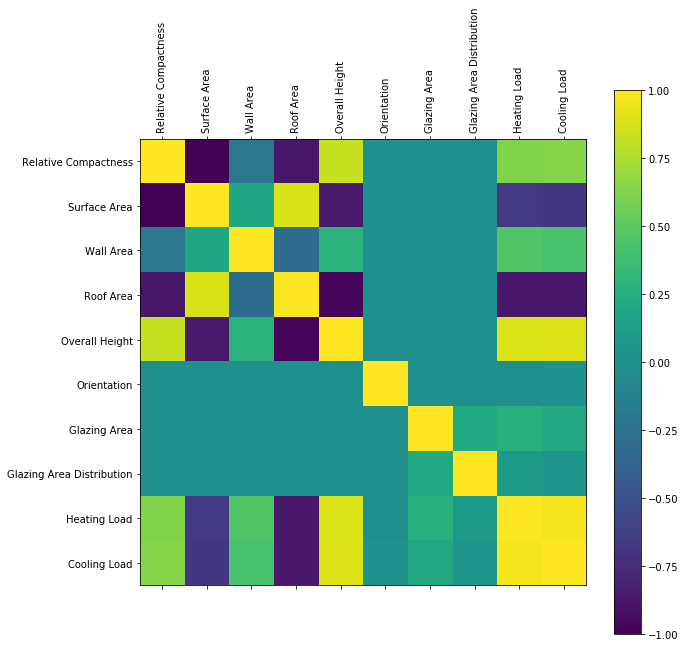

In [10]:
correlations = thermal_eff.corr()
# plot correlation matrix
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols,rotation = 90)
ax.set_yticklabels(cols)
plt.show()

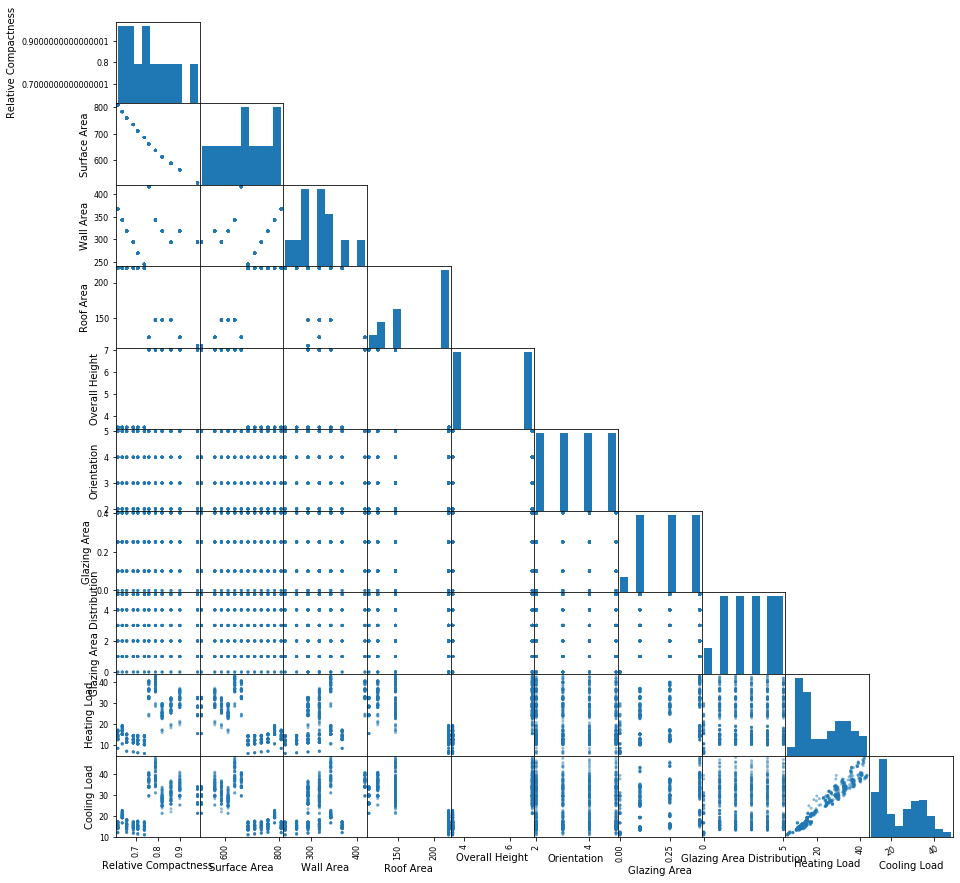

In [11]:
axes = scatter_matrix(thermal_eff, figsize = (15,15),diagonal='hist', alpha=0.5)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
            
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

At it was seen above the `Cooling Load` & `Heating Load` almost have a 1 to 1 correlation. Then for this and simplicity reasons I will keep only one of the 2 variables, and apply any conclusion obtained during the analysis to the other as well.

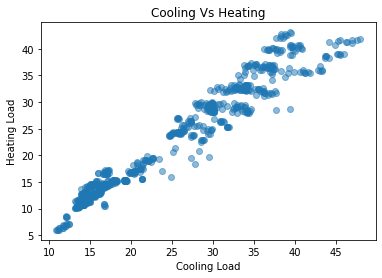

In [12]:
plt.scatter(thermal_eff['Cooling Load'], thermal_eff['Heating Load'], alpha=0.5)
plt.title('Cooling Vs Heating')
plt.xlabel('Cooling Load')
plt.ylabel("Heating Load")
plt.show()

## Attributes with apparent no correlation

Looking at the following plots (bar charts, box plots & violin plots) it is possible to notice some characteristics of the data:
- At it was mentioned before these for attributes: `Orientation`, `Glazing Area` & `Glazing Area Distribution` look more like categories than a continuous varible, therefore in the next part of the analysis they are going to be treated as categorical variables
- These 3 attributes do not seem to have a correlation with the `Heating Load` & `Cooling Load` attributes.

In [13]:
#Changing the Data Type for these 4 attributes from Numeric to a Factor (String)
thermal_eff[['Orientation', 'Glazing Area', 'Glazing Area Distribution']] = thermal_eff[['Orientation', 'Glazing Area', 'Glazing Area Distribution']].astype(str)

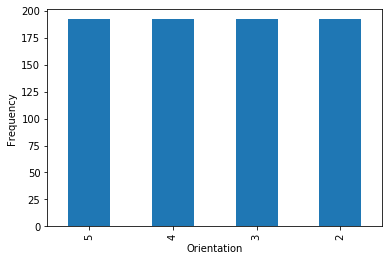

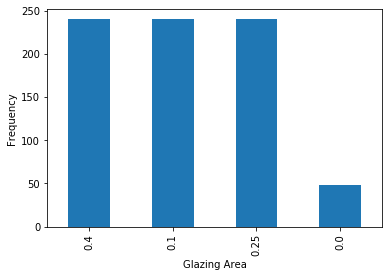

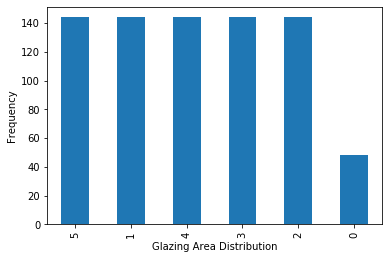

In [14]:
categorical = ['Orientation', 'Glazing Area', 'Glazing Area Distribution']
for i in categorical:
    thermal_eff.loc[:,i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

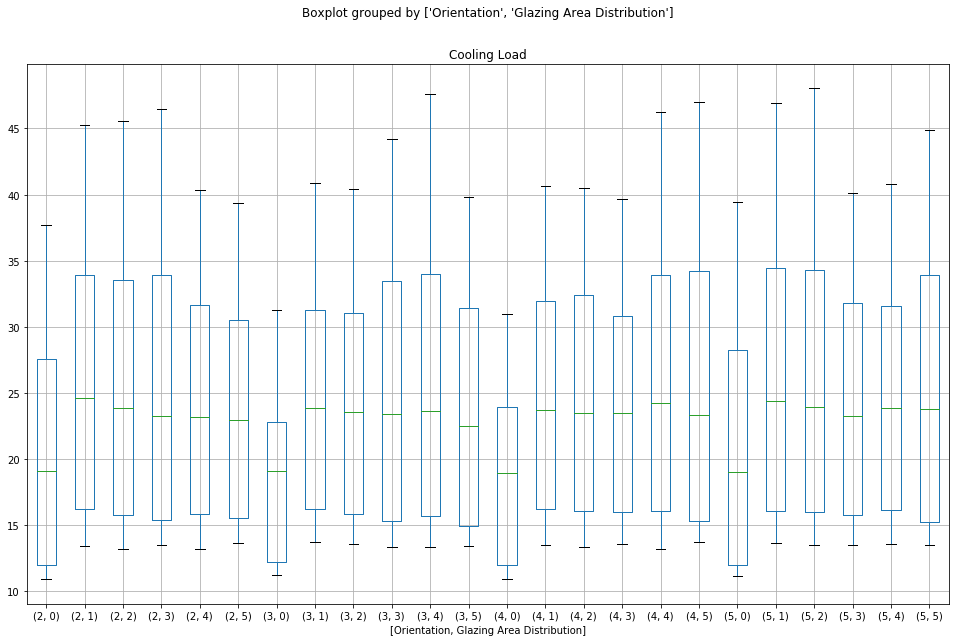

In [15]:
fig = plt.figure(figsize=(16,10)) # Define plot area
ax = fig.gca() # Define axis 
thermal_eff.loc[:,['Cooling Load','Orientation','Glazing Area Distribution' ]].boxplot(by = ['Orientation','Glazing Area Distribution'], ax = ax)

The only Box plots that seem to be slighly different are the ones for `Glazing Area Distribution` = 0.

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


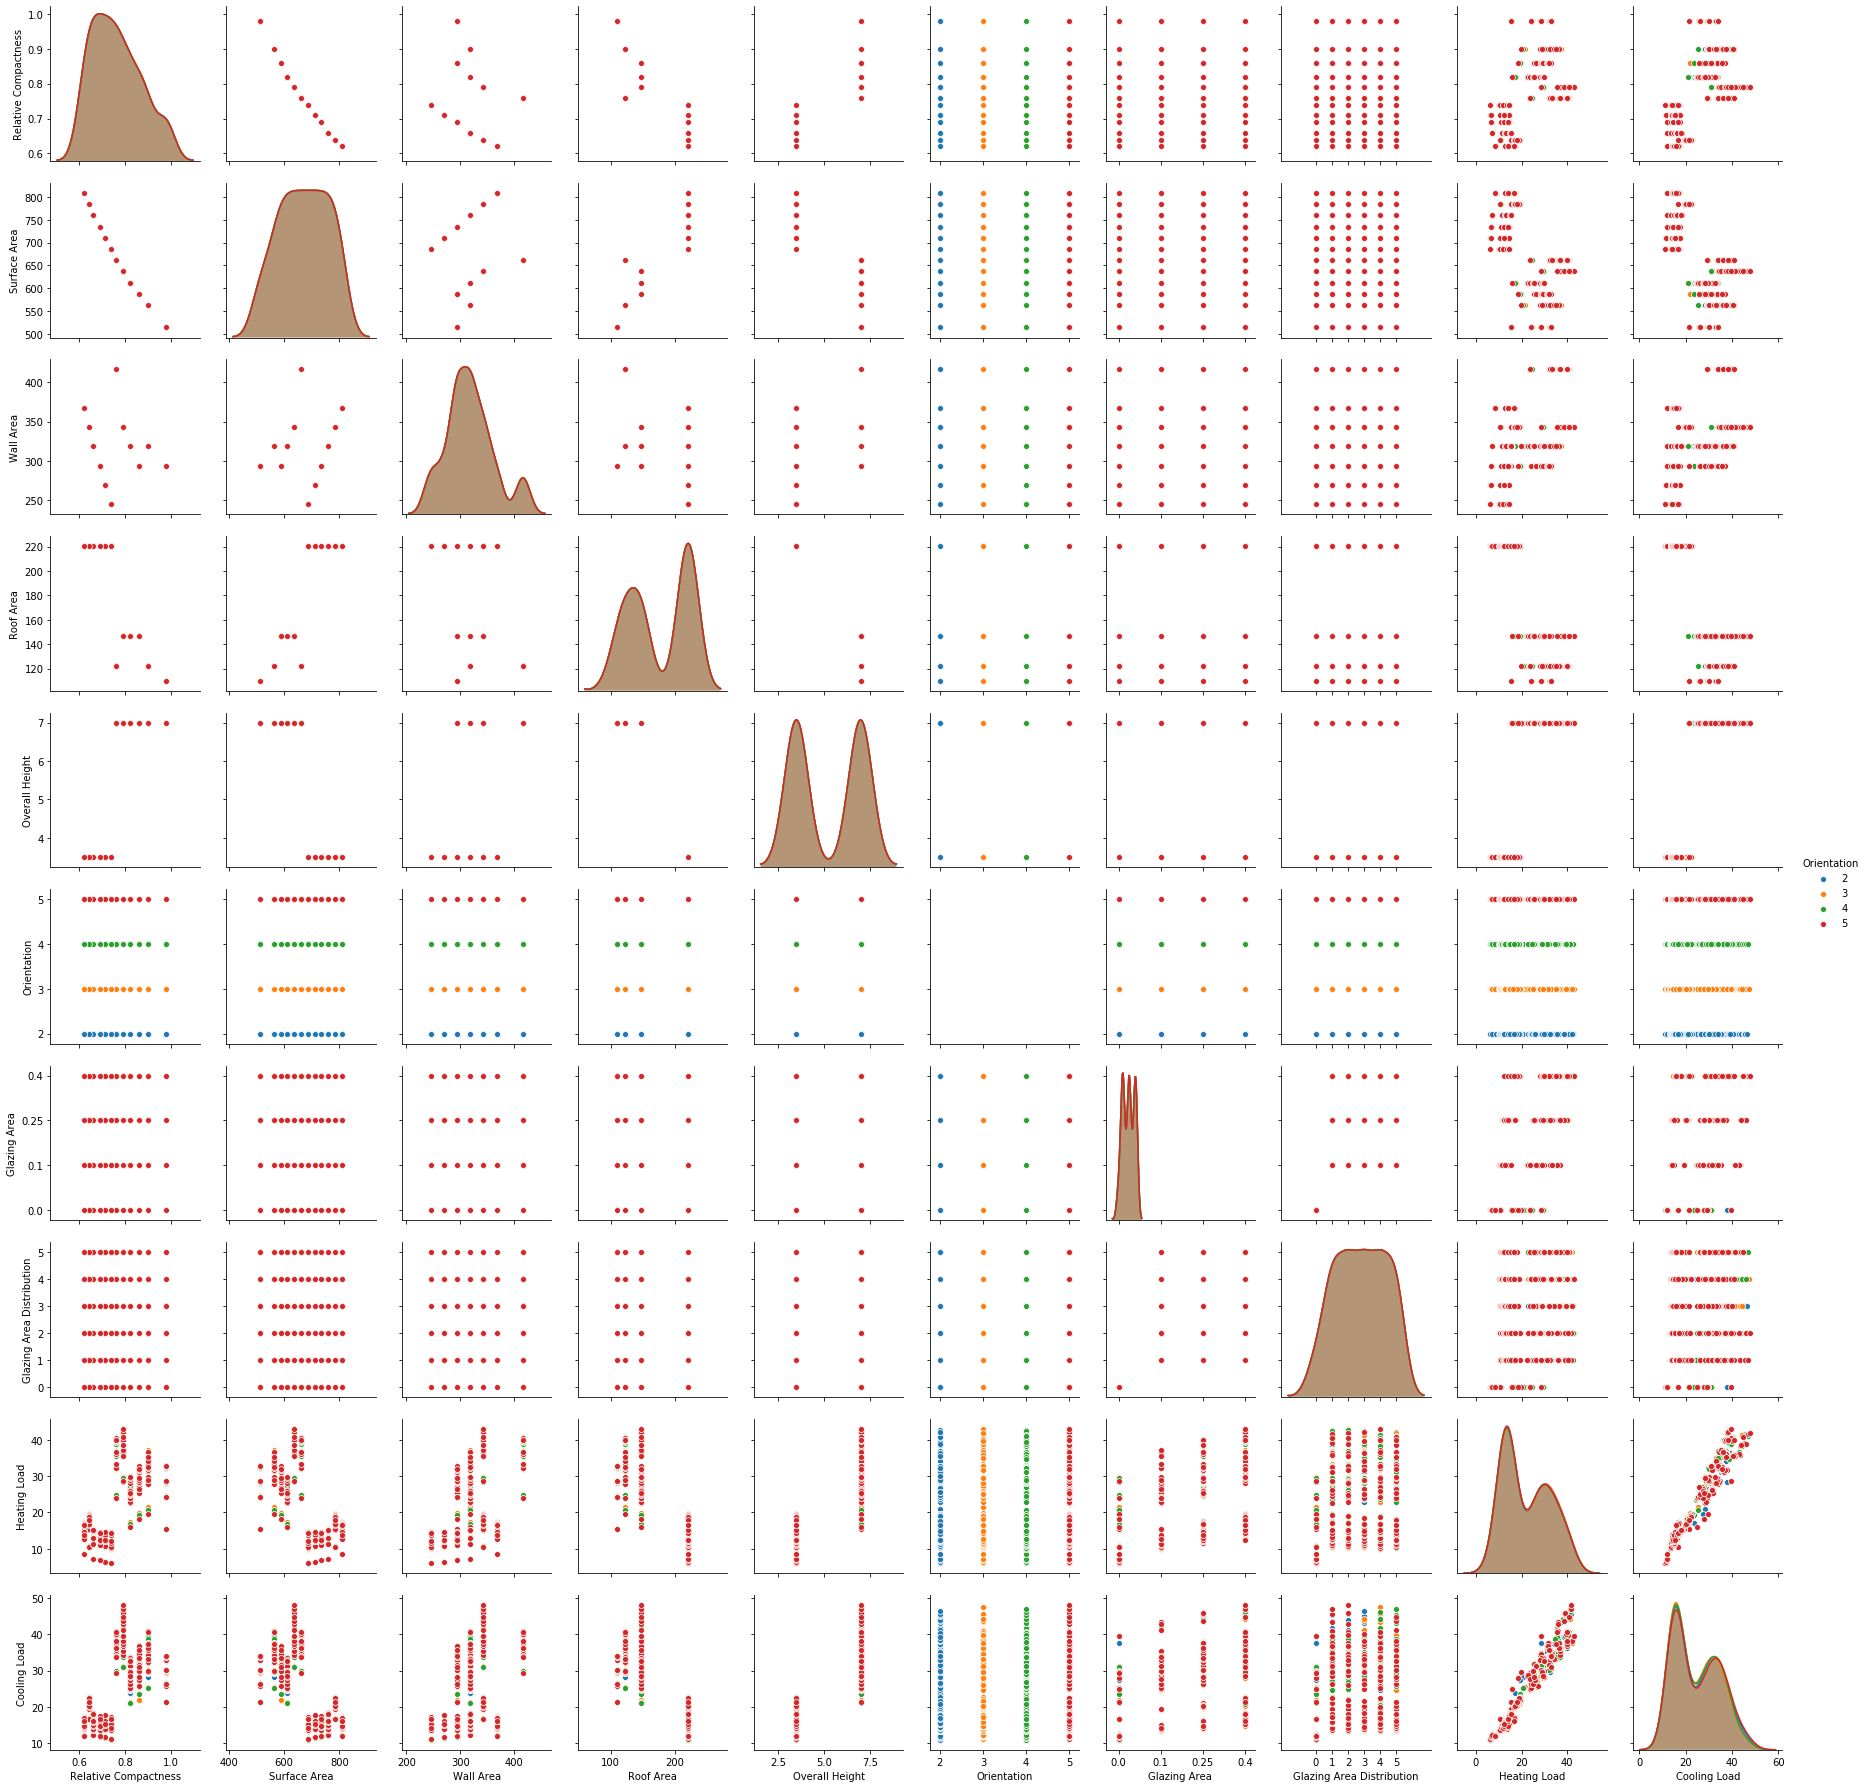

In [16]:
# Scatter plot where the data is seen as split by the attribute 'Orientation' to see if there is any significant inside
import seaborn as sns 
sns.pairplot(thermal_eff, kind="scatter", hue="Orientation")
plt.show()

**Note:** No clear difference (or group) is seeing by using the `Orientation` attribute as a divider of the data

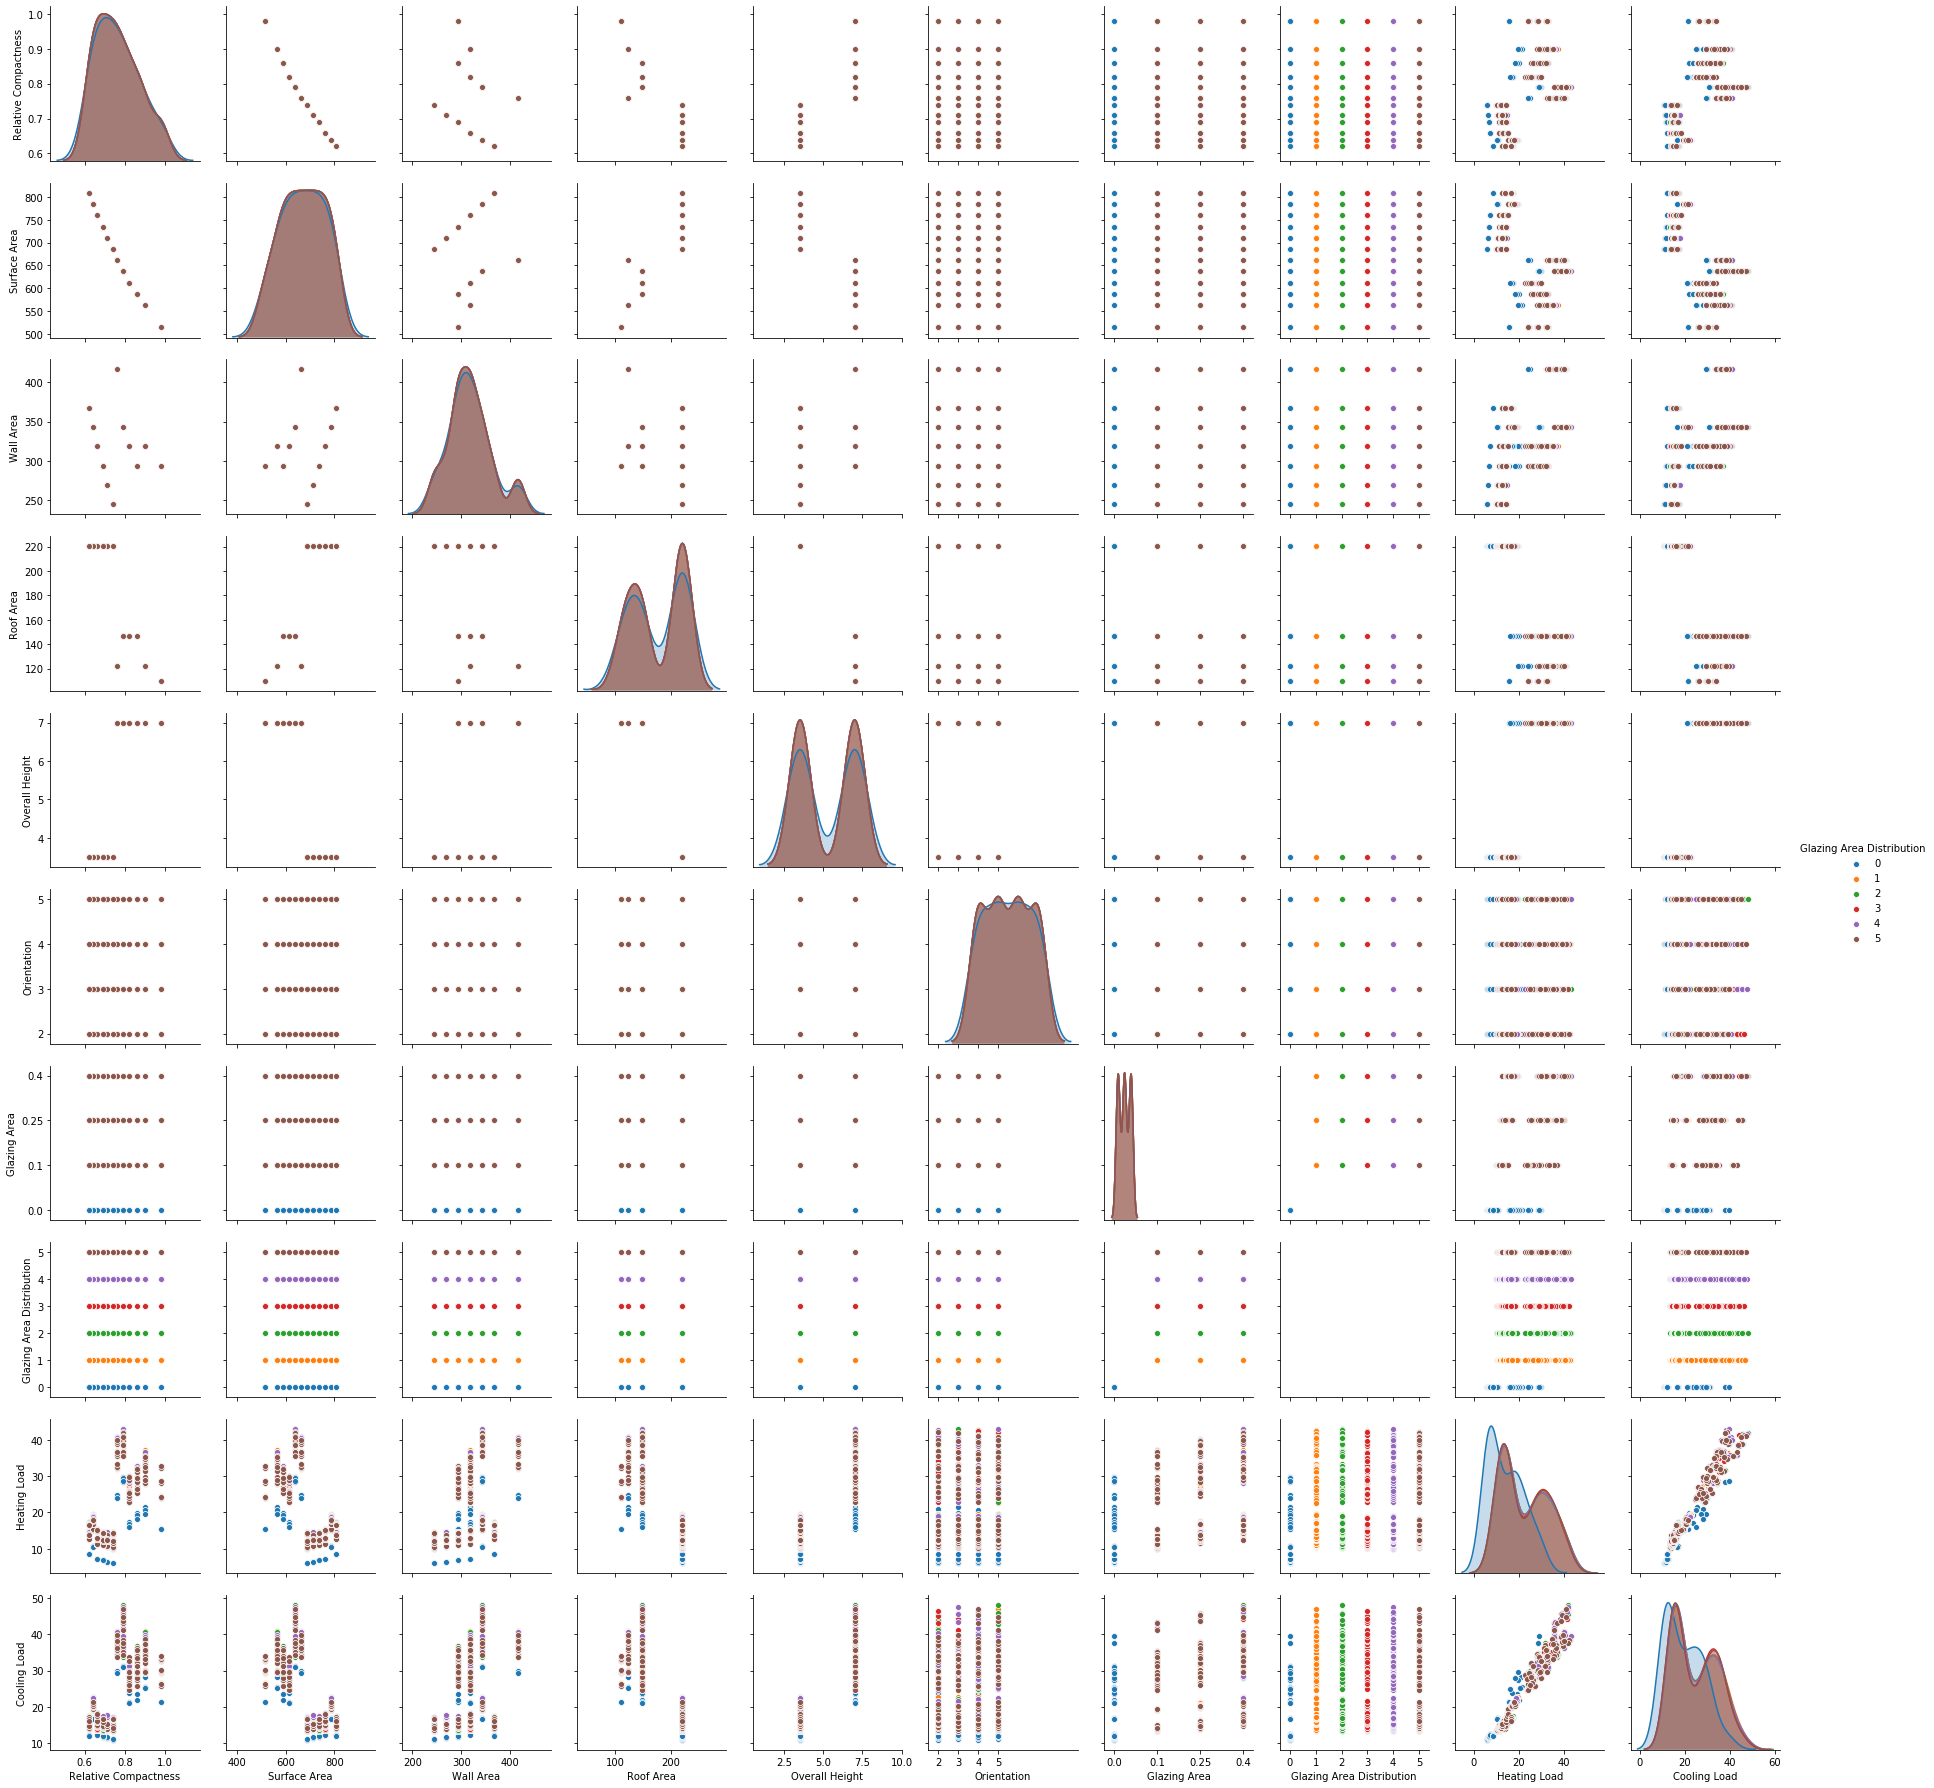

In [17]:
# Scatter plot where the data is seen as split by the attribute 'Orientation' to see if there is any significant inside
import seaborn as sns 
sns.pairplot(thermal_eff, kind="scatter", hue="Glazing Area Distribution")
plt.show()

**Note:** No clear difference (or group) is seeing by using the `Glazing Area Distribution` attribute as a divider of the data

Text(0, 0.5, 'Cooling Load')

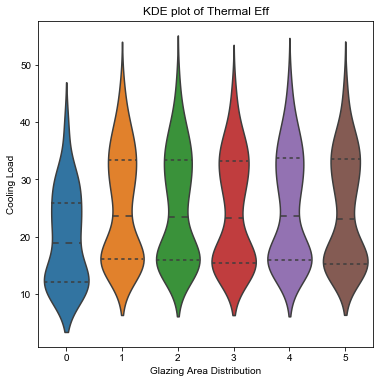

In [18]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Glazing Area Distribution', y = 'Cooling Load',  data = thermal_eff, ax = ax, split = True, inner='quart')
ax.set_title('KDE plot of Thermal Eff') # Give the plot a main title
ax.set_xlabel('Glazing Area Distribution') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

As it was seen before the only value from the `Glazing Area Distribution` attribute that seems to be a little bit different is _Zero_.

Text(0, 0.5, 'Cooling Load')

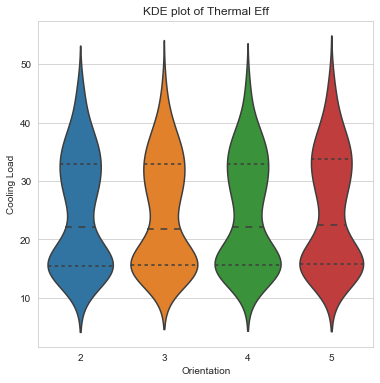

In [19]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Orientation', y = 'Cooling Load',  data = thermal_eff, ax = ax, split = True, inner='quart')
ax.set_title('KDE plot of Thermal Eff') # Give the plot a main title
ax.set_xlabel('Orientation') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

As it was seen before `Orientation` does not seem to be a factor for the `Cooling Load` (and therefore `Heating Load` as well)

## Exploring attributes with some correlation to Thermal Loads

Looking at the following plots (scatter plots) it is possible to notice some characteristics of the data:
- It is possible to see that there is a correlation between the following variables: `Relative Compactness`, `Surface Area`, `Wall Area`, `Roof Area`, & `Overall Height`.
- The only attribute that does not seem to have a strong correlation with `Cooling Load` & `Heating Load` is `Wall Area`.

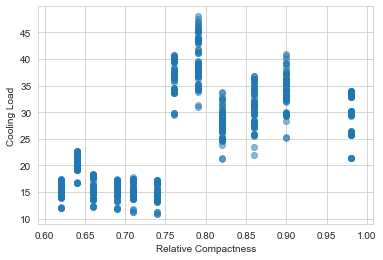

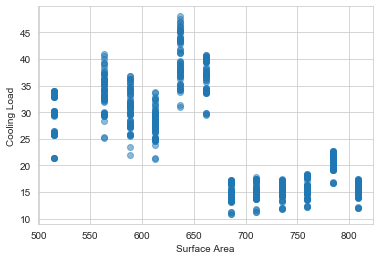

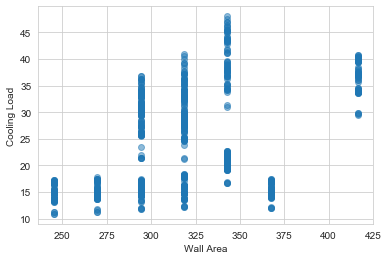

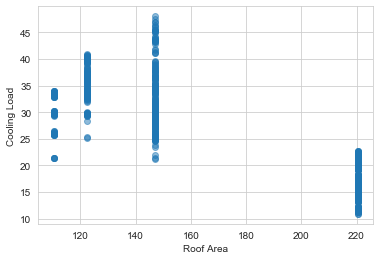

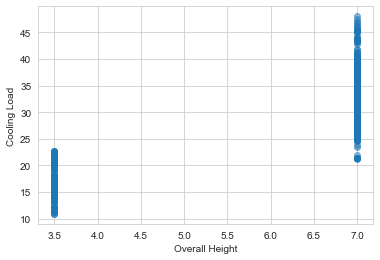

In [20]:
corr = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height']
for i in corr:
    plt.scatter(thermal_eff[i],thermal_eff['Cooling Load'], alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Cooling Load')
    plt.show()

It is highly unorthodox to show Violin Plots for 2 numeric variables, but in this case since each variable has a finite number of cases (values) it might be possible to confirm what was seen in the scatter plots above and get some insights of the data as well by means of this kind of plot.

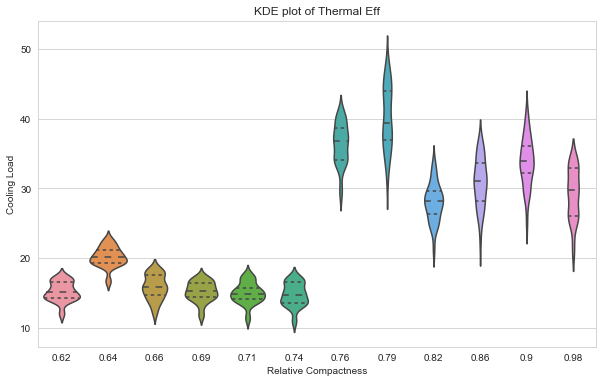

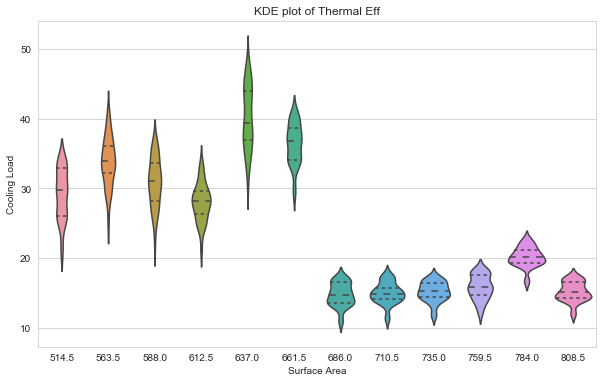

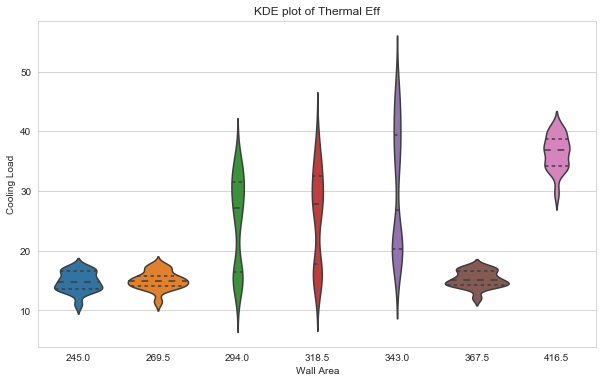

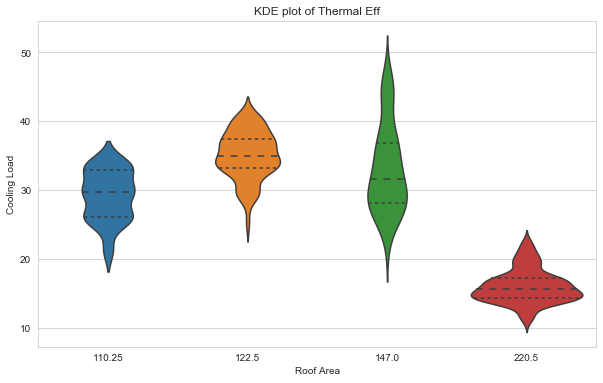

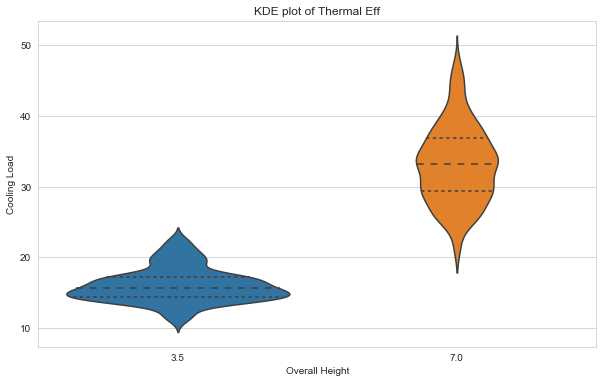

In [21]:
for i in corr:
    fig = plt.figure(figsize=(10,6)) # Define plot area
    ax = fig.gca() # Define axis 
    sns.set_style("whitegrid")
    sns.violinplot(x = i, y = 'Cooling Load',  data = thermal_eff, ax = ax, split = True, inner='quart')
    ax.set_title('KDE plot of Thermal Eff') # Give the plot a main title
    ax.set_xlabel(i) # Set text for the x axis
    ax.set_ylabel('Cooling Load')# Set text for y axis

## Conclusion/Summary:
1. The data consists of 10 attributes and 768 values.
<br> 
2. It seems based on the _Correlation Plot_ and the _Heating Vs Cooling Scatter Plot_ that there is an close 1 to 1 correlation between `Heating Load` & `Cooling Load`. This allowed a simplification on the analysis. This simplification is to look at one of those 2 and extrapolate the conclusions to the other (idea that will be explore in the next sections).
<br> 
3. A strong correlation is seen in the shape of a binomial behavior between `Cooling Load` (and `Heating Load`) and the following variables: `Relative Compactness`, `Surface Area`, `Roof Area`, & `Overall Height`.
4. Almost no relationship is seen between `Cooling Load` (and `Heating Load`) and these attributes: `Orientation`, `Glazing Area` & `Glazing Area Distribution`.
<br> 
5. Some relationship (not binomial) is seen between the `Cooling Load` and `Wall Area` that might be explore at a later time.

Some practical results are the following (based on the above plots):
- For `Relative Compactness` it seems that 0.75 is a threshold where the `Cooling Load` jump from the range of 10-25 to 20-50.
- For `Surface Area` it seems the threshold is around 670 where the `Cooling Load` lowers from the 20-50 range to the 10-25. And inverse relationship as the `Relative Compactness`
- For `Overall Height` it is possible to see 2 clear different groups, one for lower `Cooling Load` value given by the `Overall Height` = 3.5 and another for a Higher `Cooling Load` given by `Overall Height` = 7.0
- For `Roof Area` it seems the higher the area the lower the `Cooling Load` needed.